<a href="https://colab.research.google.com/github/simplytelmannn/Computer-Vision-Final-Project/blob/main/ComputerVisionforFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TelmanMalikov

In [ ]:
import kagglehub

path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flowers-recognition


In [ ]:
!kaggle datasets download alxmamaev/flowers-recognition

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!unzip /kaggle/input/flowers-recognition/flowers.zip -d /content/

unzip:  cannot find or open /kaggle/input/flowers-recognition/flowers.zip, /kaggle/input/flowers-recognition/flowers.zip.zip or /kaggle/input/flowers-recognition/flowers.zip.ZIP.


In [ ]:
import pandas as pd

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = "/kaggle/input/flowers-recognition/flowers"

Classes: ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']


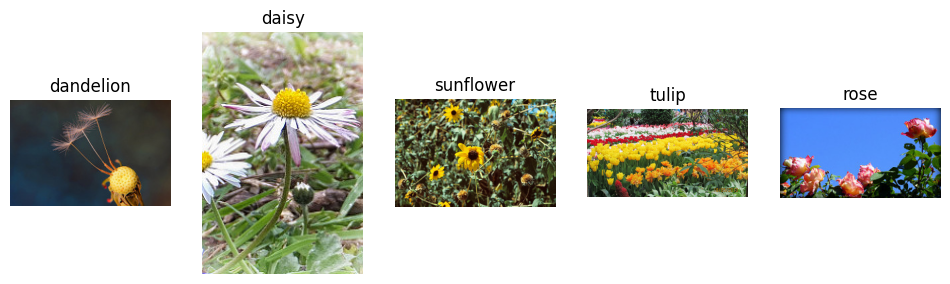

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
class_names = [item.name for item in data_dir.glob('*') if item.is_dir()]
print("Classes:", class_names)

plt.figure(figsize=(12, 8))
for i, cls in enumerate(class_names[:5]):
    img_path = list((data_dir/cls).glob("*.jpg"))[0]
    img = plt.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.show()

In [ ]:
img_size = (180, 180)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training'
)

val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


#CNN Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=img_size+(3,)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=7
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.3555 - loss: 1.6099 - val_accuracy: 0.5279 - val_loss: 1.1864
Epoch 2/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.5278 - loss: 1.1236 - val_accuracy: 0.6058 - val_loss: 1.0037
Epoch 3/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - accuracy: 0.6013 - loss: 0.9801 - val_accuracy: 0.5953 - val_loss: 1.0118
Epoch 4/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.6710 - loss: 0.8676 - val_accuracy: 0.5930 - val_loss: 1.0679
Epoch 5/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.6609 - loss: 0.8760 - val_accuracy: 0.6163 - val_loss: 1.0072
Epoch 6/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.6628 - loss: 0.8741 - val_accuracy: 0.6640 - val_loss: 0.8610
Epoch 7/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.6989 - loss: 0.7782 - val_accuracy: 0.6500 - val_loss: 0.8947


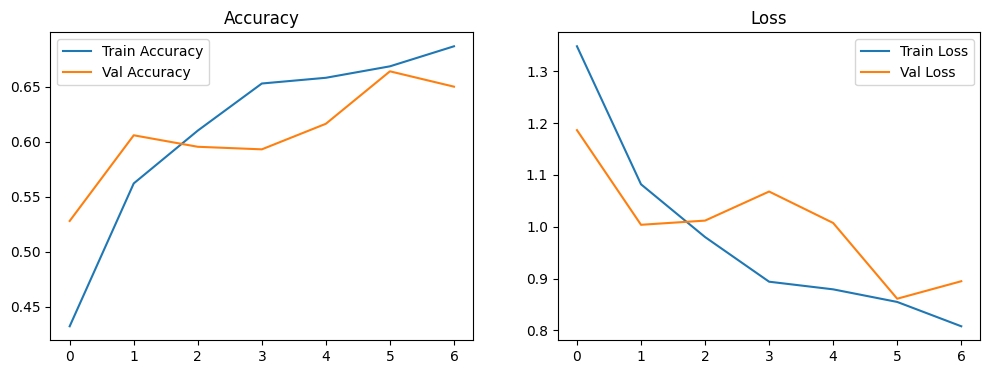

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


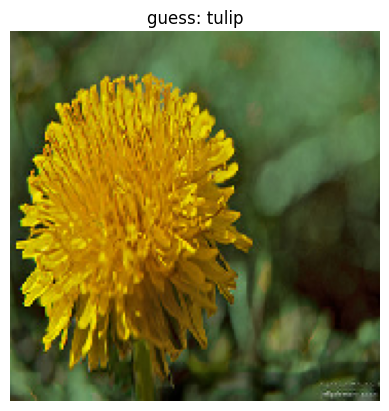

In [ ]:
import numpy as np

img_path = list(data_dir.glob('*/*.jpg'))[50]
img = tf.keras.utils.load_img(img_path, target_size=img_size)
img_array = tf.keras.utils.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]
plt.imshow(img)
plt.title(f"guess: {pred_class}")
plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model

base_model = EfficientNetB0(weights='imagenet', include_top=False,
                            input_shape=img_size+(3,))
base_model.trainable = False

model_tl = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model_tl.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model_tl.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 6, 6, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,378,792 (16.70 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history_tl = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=7
)

Epoch 1/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.2233 - loss: 1.6527 - val_accuracy: 0.2442 - val_loss: 1.6009
Epoch 2/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.2165 - loss: 1.6125 - val_accuracy: 0.2442 - val_loss: 1.5985
Epoch 3/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.2446 - loss: 1.5994 - val_accuracy: 0.2279 - val_loss: 1.6021
Epoch 4/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.2411 - loss: 1.5993 - val_accuracy: 0.2442 - val_loss: 1.5991
Epoch 5/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.2354 - loss: 1.6018 - val_accuracy: 0.2442 - val_loss: 1.5999
Epoch 6/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.2411 - loss: 1.6012 - val_accuracy: 0.2442 - val_loss: 1.5985
Epoch 7/7
109/109 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.2434 - loss: 1.6029 - val_accuracy: 0.2442 - val_loss: 1.6003


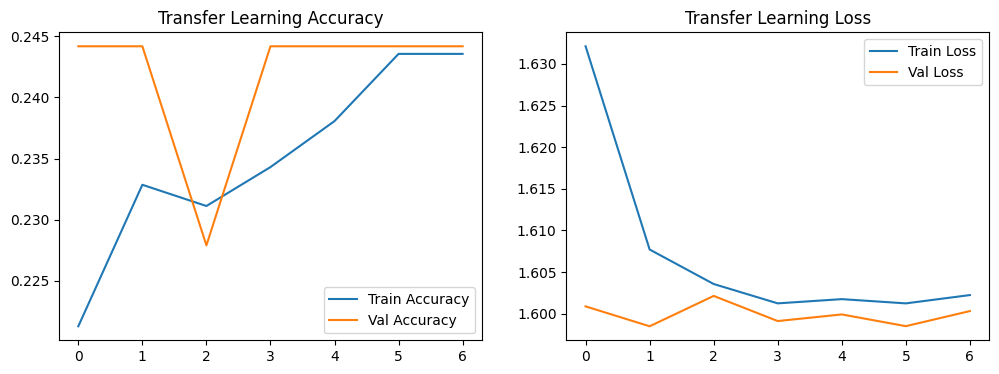

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Transfer Learning Accuracy")

plt.subplot(1,2,2)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Transfer Learning Loss")

plt.show()

In [ ]:
base_model.trainable = True

model_tl.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_ft = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 837s 7s/step - accuracy: 0.2657 - loss: 1.6793 - val_accuracy: 0.2442 - val_loss: 1.6034
Epoch 2/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 773s 7s/step - accuracy: 0.4257 - loss: 1.3858 - val_accuracy: 0.2384 - val_loss: 1.6121
Epoch 3/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 790s 7s/step - accuracy: 0.5522 - loss: 1.1843 - val_accuracy: 0.2372 - val_loss: 1.6000


#ResNet50 Transfer Learning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=img_size+(3,))
base_model.trainable = False

model_resnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model_resnet.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

model_resnet.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 6, 6, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history_resnet = model_resnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6
)

Epoch 1/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.2616 - loss: 1.6921 - val_accuracy: 0.2965 - val_loss: 1.5628
Epoch 2/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 582s 5s/step - accuracy: 0.2965 - loss: 1.5564 - val_accuracy: 0.3372 - val_loss: 1.5268
Epoch 3/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 550s 5s/step - accuracy: 0.2981 - loss: 1.5550 - val_accuracy: 0.3605 - val_loss: 1.5168
Epoch 4/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 552s 5s/step - accuracy: 0.3275 - loss: 1.5295 - val_accuracy: 0.3640 - val_loss: 1.5131
Epoch 5/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 548s 5s/step - accuracy: 0.3440 - loss: 1.5183 - val_accuracy: 0.3314 - val_loss: 1.5240
Epoch 6/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 582s 5s/step - accuracy: 0.3268 - loss: 1.5269 - val_accuracy: 0.3651 - val_loss: 1.4868


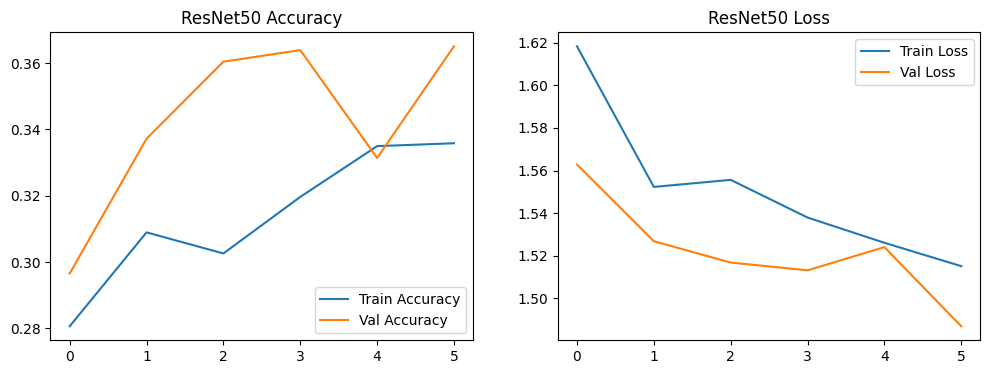

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("ResNet50 Accuracy")

plt.subplot(1,2,2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("ResNet50 Loss")

plt.show()

In [ ]:
base_model.trainable = True

model_resnet.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_ft_resnet = model_resnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 2180s 20s/step - accuracy: 0.1891 - loss: 4.2745 - val_accuracy: 0.1547 - val_loss: 2.0215
Epoch 2/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 2121s 19s/step - accuracy: 0.5451 - loss: 1.2621 - val_accuracy: 0.2442 - val_loss: 2.5484
Epoch 3/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 2127s 20s/step - accuracy: 0.7392 - loss: 0.7447 - val_accuracy: 0.2651 - val_loss: 1.9347


#Baseline CNN vs ResNet50 müqayisə

In [ ]:
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=img_size+(3,)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline = baseline_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6
)

Epoch 1/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.3051 - loss: 1.6563 - val_accuracy: 0.4884 - val_loss: 1.1909
Epoch 2/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.5021 - loss: 1.2354 - val_accuracy: 0.5430 - val_loss: 1.1149
Epoch 3/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.5944 - loss: 1.0502 - val_accuracy: 0.5605 - val_loss: 1.1053
Epoch 4/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.5975 - loss: 0.9958 - val_accuracy: 0.6384 - val_loss: 0.9361
Epoch 5/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.6580 - loss: 0.8901 - val_accuracy: 0.6244 - val_loss: 0.9435
Epoch 6/6
109/109 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.6698 - loss: 0.8272 - val_accuracy: 0.6419 - val_loss: 0.9190


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=img_size+(3,))
base_model.trainable = False

resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_resnet = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6
)

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Val Accuracy')
plt.legend()
plt.title("Validation Accuracy Comparison")

plt.subplot(1,2,2)
plt.plot(history_baseline.history['val_loss'], label='Baseline Val Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet50 Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
y_pred = resnet_model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = val_ds.classes
class_labels = list(val_ds.class_indices.keys())

In [ ]:
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("ResNet50 Confusion Matrix")
plt.show()

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()

#ResNet50 üçün accuracy

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# 🔹 Test setdən bütün etiketləri götür
y_true = []
y_pred = []

for images, labels in val_ds:   # istəsən test_ds də ola bilər
    preds = resnet_model.predict(images)
    preds = np.argmax(preds, axis=1)
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

# 🔹 Classification Report
print("📊 Classification Report (ResNet50):")
print(classification_report(y_true, y_pred, digits=2))


In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))))
        plt.tight_layout()
        count+=1

#ResNet50 üçün test vizualizasiyası

In [ ]:
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
def get_label_name(label):
    return class_names[label]

In [ ]:
import numpy as np

X_test = []
y_test = []

for images, labels in val_ds:  # və ya test_ds
    X_test.append(images)
    y_test.append(labels)

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [ ]:
predicted_labels = np.argmax(resnet_model.predict(X_test), axis=1)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
for i in range(min(25, len(X_test))):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    predicted_label = predicted_labels[i]
    actual_label = np.argmax(y_test[i]) if y_test.ndim==2 else y_test[i]
    title = f"Predicted: {get_label_name(predicted_label)}\nActual: {get_label_name(actual_label)}"
    plt.title(title)

plt.show()